In [1]:
import pandas as pd
import healpy as hp
import numpy as np

import mortie as mt

Download the data for this example [here](https://earth.gsfc.nasa.gov/sites/default/files/lab_cryo/data/polar_ice_altimetry/antarctic_and_greenland_drainage_systems/ant_grounded_drainagesystem_polygons.txt)

These are continental hydrologic basins.

In [2]:
basins = pd.read_csv('./Ant_Grounded_DrainageSystem_Polygons.txt',
                     names=['Lat','Lon','basin'], delim_whitespace=True)

In [3]:
# Subsetting to basin 4
b4 = basins[basins.basin == 4]

In [4]:
b4

,Lat,Lon,basin
196966,-71.013116,-10.087038,4
196967,-71.026350,-10.069613,4
196968,-71.038885,-10.057657,4
196969,-71.053623,-10.033951,4
196970,-71.066636,-10.006919,4
...,...,...,...
239366,-70.943902,-10.055204,4
239367,-70.965003,-10.086568,4
239368,-70.980942,-10.108149,4
239369,-70.993810,-10.123396,4


The healpix datum is a spherical spatial index tree (really a 'trei' since it divides the embedding space). The original formulation allows for 28 levels of the tree; however, numerical precision and inefficent filling of the 64-bit integer means that the mortie package tops out 10 levels before that at level 18. This means that the smallest 'cell' that mortie can represent is ~25 meters on a side:

In [5]:
mt.res2display()

6508.1853 km at tessellation order 0
3254.09265 km at tessellation order 1
1627.046325 km at tessellation order 2
813.5231625 km at tessellation order 3
406.76158125 km at tessellation order 4
203.380790625 km at tessellation order 5
101.6903953125 km at tessellation order 6
50.84519765625 km at tessellation order 7
25.422598828125 km at tessellation order 8
12.7112994140625 km at tessellation order 9
6.35564970703125 km at tessellation order 10
3.177824853515625 km at tessellation order 11
1.5889124267578125 km at tessellation order 12
0.7944562133789063 km at tessellation order 13
0.39722810668945313 km at tessellation order 14
0.19861405334472657 km at tessellation order 15
0.09930702667236328 km at tessellation order 16
0.04965351333618164 km at tessellation order 17
0.02482675666809082 km at tessellation order 18
0.01241337833404541 km at tessellation order 19


There's more details at the [healpy tutorial](https://healpy.readthedocs.io/en/latest/tutorial.html), the [healpix primer](https://healpix.jpl.nasa.gov/pdf/intro.pdf), and [this presentation](https://dcc.ligo.org/public/0149/G1800186/003/healpix-multiresolution.pdf)

39


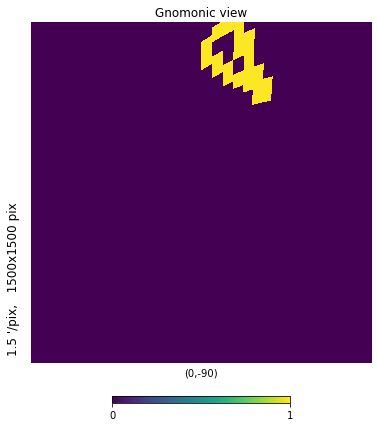

In [6]:
# Plotting coarse grid, level 6 of the tree with 100km grid cells
nside = 2**6
b2idx = hp.ang2pix(nside,b4.Lon.values, b4.Lat.values, lonlat=True) 
m = np.zeros(hp.nside2npix(nside))
m[np.unique(b2idx).ravel()] += 1
# Centered on the south pole
hp.gnomview(m, rot=[0,-90], xsize=1500, ysize=1500)# , nest=True)
print(len(np.unique(b2idx).ravel()))

In [7]:
np.unique(b2idx).ravel()

array([47848, 47849, 47948, 47949, 48043, 48044, 48045, 48046, 48135,
       48136, 48138, 48223, 48224, 48227, 48307, 48308, 48311, 48386,
       48387, 48390, 48391, 48461, 48462, 48463, 48465, 48466, 48467,
       48533, 48534, 48535, 48536, 48537, 48538, 48601, 48602, 48603,
       48604, 48605, 48666])

These are the healpix numbers level 6 of the tree. If we ask for them at a different level, they change in an unpredictable way:

380


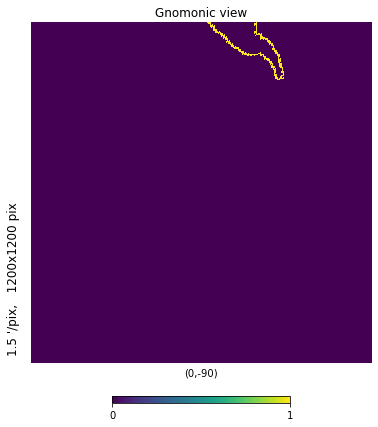

In [8]:
# Level 9 of the tree, up three orders of magnatude-- now the cells 12km in size, and there are more of them
nside = 2**9
b2idx = hp.ang2pix(nside,b4.Lon.values, b4.Lat.values, lonlat=True) 
m = np.zeros(hp.nside2npix(nside))
m[np.unique(b2idx).ravel()] += 1
# Centered on the south pole
hp.gnomview(m, rot=[0,-90], xsize=1200, ysize=1200)# , nest=True)
print(len(np.unique(b2idx).ravel()))

In [9]:
# Note that the new indices have no obvious relationship to the other indices at the lower resolution
np.unique(b2idx).ravel()

array([3059591, 3059592, 3060419, 3060420, 3061244, 3061245, 3062060,
       3062064, 3062065, 3062876, 3062877, 3062879, 3062880, 3062881,
       3062882, 3063688, 3063689, 3063691, 3063692, 3063693, 3063694,
       3064496, 3064498, 3064500, 3064502, 3065300, 3065303, 3065304,
       3065306, 3066101, 3066104, 3066106, 3066898, 3066899, 3066902,
       3067691, 3067692, 3067694, 3068479, 3068480, 3068482, 3069263,
       3069264, 3069267, 3070043, 3070044, 3070047, 3070819, 3070823,
       3071591, 3071596, 3072359, 3072365, 3073121, 3073122, 3073123,
       3073130, 3073880, 3073881, 3073882, 3073883, 3073890, 3074633,
       3074636, 3074637, 3074647, 3074651, 3075386, 3075387, 3075388,
       3075400, 3075401, 3075402, 3075403, 3076134, 3076135, 3076136,
       3076149, 3076150, 3076151, 3076152, 3076879, 3076896, 3077615,
       3077616, 3077617, 3077618, 3077619, 3077636, 3078351, 3078352,
       3078353, 3078354, 3078355, 3078373, 3079083, 3079105, 3079811,
       3079833, 3080

The reason that morton indexing exists, and is interesting, is that it encodes multiple resolutions of data in a meaningful and consistent way. Here's the same data, converted to tree level 9, but using mortie:

In [10]:
%%time

# uniq requires nest order
order = 9
uniq = mt.geo2uniq(b4.Lat.values, b4.Lon.values, order)
parents = mt.unique2parent(uniq)
normed = mt.heal_norm(parents,order, uniq)

mortons6 = mt.fastNorm2Mort(order,normed.ravel(), parents.ravel())
print(len(np.unique(mortons6).ravel()))
np.unique(mortons6).ravel()

380
CPU times: user 12.3 ms, sys: 5.02 ms, total: 17.3 ms
Wall time: 27.9 ms


array([-6121322111, -6121321222, -6121321221, -6121321212, -6121321211,
       -6121321124, -6121321123, -6121321122, -6121321114, -6121321112,
       -6121321111, -6121312222, -6121312122, -6121312121, -6121312114,
       -6121312113, -6121312112, -6121312111, -6121311224, -6121311223,
       -6121311222, -6121311214, -6121311213, -6121311212, -6121311211,
       -6121311124, -6121311123, -6121311114, -6121311113, -6121243222,
       -6121243221, -6121243134, -6121243133, -6121243132, -6121243131,
       -6121243122, -6121243121, -6121243113, -6121243111, -6121242333,
       -6121241444, -6121241443, -6121241442, -6121241441, -6121241434,
       -6121241433, -6121241432, -6121241431, -6121241423, -6121241414,
       -6121241413, -6121241344, -6121241343, -6121241334, -6121241333,
       -6121241324, -6121241323, -6121241314, -6121241313, -6121234244,
       -6121234243, -6121234234, -6121234232, -6121234221, -6121234214,
       -6121234212, -6121234211, -6121234122, -6121234121, -6121

Still 380 cells like in the other example, but now if we go to a finer grid, we just clip the edge of the index:

In [11]:
# Alternative function that's more compact from above
mortons6 = mt.clip2order(6, mt.geo2mort(b4.Lat.values, b4.Lon.values, 18))
print(len(np.unique(mortons6)))
np.unique(mortons6)

39


array([-6121322, -6121321, -6121312, -6121311, -6121243, -6121242,
       -6121241, -6121234, -6121233, -6121232, -6121223, -6121214,
       -6121212, -6121211, -6121144, -6121143, -6121134, -6121131,
       -6121123, -6121122, -6121121, -6121114, -6121113, -6112431,
       -6112423, -6112422, -6112421, -6112414, -6112413, -6112412,
       -6112411, -6112342, -6112341, -6112324, -6112323, -6112243,
       -6112242, -6112241, -6112234])

Why is this interesting? Let's say we have a petabyte of data, and we need to store it, query it, and generally interact with it. Given the structure above, we can define a file hierarchy to split the data, say using S3 buckets:

In [18]:
prefix = 's3://geostacks/icesat_2/top='
middle = '/mid='
cyc = '/cycle=8' # orbit cycle of icesat-2
suffix = '/atl06.parquet'

filelist = []

for s3dir in np.unique(mt.clip2order(4, mt.geo2mort(b4.Lat.values, b4.Lon.values, 18))):
    for a in [1,2,3,4]:
        for b in [1,2,3,4]:
            for c in [1,2,3,4]:
                filelist.append(prefix + str(s3dir) + middle + 
                                str(a)+str(b)+str(c) + 
                                cyc + suffix)

In [19]:
len(filelist)

384

In [21]:
np.random.choice(filelist, 40)

array(['s3://geostacks/icesat_2/top=-61211/mid=433/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61123/mid=122/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61124/mid=324/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61123/mid=141/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61213/mid=413/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61122/mid=233/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61122/mid=124/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61213/mid=211/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61212/mid=244/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61122/mid=342/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61211/mid=434/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61211/mid=441/cycle=8/atl06.parquet',
       's3://geostacks/icesat_2/top=-61211/mid=423/cycle=8/atl06.parquet',
       's3://geostacks/ic

In reality, we'd have three levels of division in the s3 structure, not two, and they'd be balanced in terms of number of digits...but this example is more human readable.